Importing Dependencies

In [ ]:
# importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns


print("All imports success!")

All imports success!


File Exploration


In [ ]:
df_nairobi_1 = pd.read_csv("../raw/Nairobi propertyprices - Sheet1.csv")
df_nairobi_1.head()

,Price,propertyType,Location,Bedroom,bathroom,House size,Land size
0,KSh 350 000 000,Townhouse,Runda,4.0,4.0,NaN,0.5 acres
1,KSh 30 000 000,Vacant Land,Karen,NaN,NaN,NaN,0.5 acres
2,KSh 325 000 000,Vacant Land,Westlands,NaN,NaN,NaN,0.5 acres
3,KSh 80 000 000,Townhouse,Kitisuru,5.0,5.0,NaN,0.5 acres
4,KSh 25 500 000,Apartment,Kileleshwa,4.0,4.0,230 m²,NaN


In [ ]:
df_nairobi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         204 non-null    object 
 1   propertyType  204 non-null    object 
 2   Location      204 non-null    object 
 3   Bedroom       183 non-null    float64
 4   bathroom      181 non-null    float64
 5   House size    99 non-null     object 
 6   Land size     64 non-null     object 
dtypes: float64(2), object(5)
memory usage: 11.3+ KB


In [ ]:
df_nairobi_2 = pd.read_csv("../raw/rent_apts.csv")
df_nairobi_2.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [ ]:
df_nairobi_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


Data Cleaning


In [ ]:
# we have several issues with our dataset
# price is an object(a string) which out to be float for simpler analysis
# several missing features in different columns
# we begin by fixin the missing features on "df_nairobi_1"

df_nairobi_1.dropna(inplace=True)
df_nairobi_1.head()



,Price,propertyType,Location,Bedroom,bathroom,House size,Land size
79,KSh 142 000 000,Townhouse,Lavington,4.0,4.0,800 m²,0.5 acres
94,KSh 6 500 000,Apartment,Lavington,1.0,1.0,1,0.5 acres


In [ ]:
df_nairobi_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 79 to 94
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         2 non-null      object 
 1   propertyType  2 non-null      object 
 2   Location      2 non-null      object 
 3   Bedroom       2 non-null      float64
 4   bathroom      2 non-null      float64
 5   House size    2 non-null      object 
 6   Land size     2 non-null      object 
dtypes: float64(2), object(5)
memory usage: 128.0+ bytes


In [ ]:
# we droped propertyType and Land size columns we dont need

df_nairobi_1.drop(columns="propertyType", inplace=True)
df_nairobi_1.drop(columns="Land size", inplace=True)

df_nairobi_1.head()

,Price,Location,Bedroom,bathroom,House size
79,KSh 142 000 000,Lavington,4.0,4.0,800 m²
94,KSh 6 500 000,Lavington,1.0,1.0,1


In [ ]:
# renaming the bathroom and house size columns

df_nairobi_1.rename(columns={"bathroom": "Bathroom"}, inplace=True)
df_nairobi_1.rename(columns={"House size": "area_m2"}, inplace=True)
df_nairobi_1.head()

,Price,Location,Bedroom,Bathroom,area_m2
79,KSh 142 000 000,Lavington,4.0,4.0,800 m²
94,KSh 6 500 000,Lavington,1.0,1.0,1


In [ ]:
# checking our dtypes to see if they are correct
df_nairobi_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 79 to 94
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2 non-null      object 
 1   Location  2 non-null      object 
 2   Bedroom   2 non-null      float64
 3   Bathroom  2 non-null      float64
 4   area_m2   2 non-null      object 
dtypes: float64(2), object(3)
memory usage: 96.0+ bytes


In [ ]:
# our price and area_m2 are objects and need to be converted to float for us to be able to work with them numerically
# our price is in ksh we'll convert to usd(rate as at 2025 september 1usd = 126ksh)
# price ksh and " " replacement and float conversion
df_nairobi_1["Price"] = (
    df_nairobi_1["Price"]
    .str.replace("KSh", "", regex=False)
    .str.replace(" ", "", regex=False)
    .astype(float)
)


In [ ]:
# area_m2 m2 and " " replacement and conversion to float
df_nairobi_1["area_m2"] = (
    df_nairobi_1["area_m2"]
    .str.replace("m²", "", regex=False)
    .str.replace(" ", "", regex=False)
    .astype(float)
)

In [ ]:
df_nairobi_1.head()

,Price,Location,Bedroom,Bathroom,area_m2
79,142000000.0,Lavington,4.0,4.0,800.0
94,6500000.0,Lavington,1.0,1.0,1.0


In [ ]:
# converting price to usd
df_nairobi_1["price_usd"] = (df_nairobi_1["Price"] / 126).round(1)

# drop our price in KSh column
df_nairobi_1.drop(columns="Price", inplace=True)

df_nairobi_1.head()

,Location,Bedroom,Bathroom,area_m2,price_usd
79,Lavington,4.0,4.0,800.0,1126984.1
94,Lavington,1.0,1.0,1.0,51587.3


In [ ]:
df_nairobi_1.rename(columns={"Location": "location"}, inplace=True)
df_nairobi_1.rename(columns={"Bedroom": "bedroom"}, inplace=True)
df_nairobi_1.rename(columns={"Bathroom": "bathroom"}, inplace=True)

df_nairobi_1.head()

,location,bedroom,bathroom,area_m2,price_usd
79,Lavington,4.0,4.0,800.0,1126984.1
94,Lavington,1.0,1.0,1.0,51587.3


In [ ]:
df_nairobi_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 79 to 94
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   2 non-null      object 
 1   bedroom    2 non-null      float64
 2   bathroom   2 non-null      float64
 3   area_m2    2 non-null      float64
 4   price_usd  2 non-null      float64
dtypes: float64(4), object(1)
memory usage: 96.0+ bytes


Our df_nairobi_1 is cleand and everything looks good to our liking and we are proceeding to work on 
df_nairobi_2 dataframe

In [ ]:
df_nairobi_2.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [ ]:
df_nairobi_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


In [ ]:
# we begin by droping the NaN rows
df_nairobi_2.dropna(inplace=True)
df_nairobi_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 0 to 1846
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1557 non-null   object 
 1   Neighborhood  1557 non-null   object 
 2   Price         1557 non-null   object 
 3   link          1557 non-null   object 
 4   sq_mtrs       1557 non-null   float64
 5   Bedrooms      1557 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 97.3+ KB


In [ ]:
# drop the columns we dont need "agency" and "link"
df_nairobi_2.drop(columns="Agency", inplace=True)
df_nairobi_2.drop(columns="link", inplace=True)

df_nairobi_2.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,"General Mathenge, Westlands","KSh 155,000",4.0,4.0,4.0
1,"Kilimani, Dagoretti North","KSh 100,000",300.0,3.0,4.0
2,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",3.0,3.0,5.0
3,"Kilimani, Dagoretti North","KSh 135,000",227.0,3.0,4.0
6,"Off Denis Pritt, Kilimani, Dagoretti North","KSh 100,000",14.0,2.0,3.0


In [ ]:
# Step 1: Clean double commas (replace ",," with ",")
df_nairobi_2["Neighborhood"] = df_nairobi_2["Neighborhood"].str.replace(",,", ",", regex=False)

# Step 2: Strip leading/trailing spaces around commas
df_nairobi_2["Neighborhood"] = df_nairobi_2["Neighborhood"].str.replace(r"\s*,\s*", ",", regex=True)

# Step 3: Define function to extract location keywords
def extract_location(text):
    text = text.lower()
    if "kileleshwa" in text:
        return "Kileleshwa"
    elif "lavington" in text:
        return "Lavington"
    elif "kilimani" in text:
        return "Kilimani"
    elif "westlands" in text:
        return "Westlands"
    else:
        return "Runda"

# Step 4: Create Location column based on Neighborhood
df_nairobi_2["Location"] = df_nairobi_2["Neighborhood"].apply(extract_location)

# Preview first 20 rows

df_nairobi_2.head(20)


,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,Location
0,"General Mathenge,Westlands","KSh 155,000",4.0,4.0,4.0,Westlands
1,"Kilimani,Dagoretti North","KSh 100,000",300.0,3.0,4.0,Kilimani
2,"Hatheru Rd,Lavington,Dagoretti North","KSh 75,000",3.0,3.0,5.0,Lavington
3,"Kilimani,Dagoretti North","KSh 135,000",227.0,3.0,4.0,Kilimani
6,"Off Denis Pritt,Kilimani,Dagoretti North","KSh 100,000",14.0,2.0,3.0,Kilimani
7,"Westlands Area,Westlands","KSh 100,000",186.0,3.0,3.0,Westlands
9,"Kilimani,Dagoretti North","KSh 65,000",2.0,2.0,2.0,Kilimani
10,"Raphta rd,Rhapta Road,Westlands","KSh 95,000",2.0,2.0,2.0,Westlands
11,"Thindigua,Thindigua","KSh 75,000",3.0,3.0,3.0,Runda
12,"Kileleshwa,Dagoretti North","KSh 65,000",3.0,3.0,2.0,Kileleshwa


In [ ]:
df_nairobi_2.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,Location
0,"General Mathenge,Westlands","KSh 155,000",4.0,4.0,4.0,Westlands
1,"Kilimani,Dagoretti North","KSh 100,000",300.0,3.0,4.0,Kilimani
2,"Hatheru Rd,Lavington,Dagoretti North","KSh 75,000",3.0,3.0,5.0,Lavington
3,"Kilimani,Dagoretti North","KSh 135,000",227.0,3.0,4.0,Kilimani
6,"Off Denis Pritt,Kilimani,Dagoretti North","KSh 100,000",14.0,2.0,3.0,Kilimani


In [ ]:
# convert column names to lower and price from str to float
df_nairobi_2.rename(columns={"Price": "price"}, inplace=True)
df_nairobi_2.rename(columns={"sq_mtrs": "area_m2"}, inplace=True)
df_nairobi_2.rename(columns={"Bedrooms": "bedroom"}, inplace=True)
df_nairobi_2.rename(columns={"Bathrooms": "bathroom"}, inplace=True)
df_nairobi_2.rename(columns={"Location": "location"}, inplace=True)

df_nairobi_2.head()

,Neighborhood,price,area_m2,bedroom,bathroom,location
0,"General Mathenge,Westlands","KSh 155,000",4.0,4.0,4.0,Westlands
1,"Kilimani,Dagoretti North","KSh 100,000",300.0,3.0,4.0,Kilimani
2,"Hatheru Rd,Lavington,Dagoretti North","KSh 75,000",3.0,3.0,5.0,Lavington
3,"Kilimani,Dagoretti North","KSh 135,000",227.0,3.0,4.0,Kilimani
6,"Off Denis Pritt,Kilimani,Dagoretti North","KSh 100,000",14.0,2.0,3.0,Kilimani


In [ ]:
# prices from object to float
df_nairobi_2.rename(columns={"price": "price_usd"}, inplace=True)

df_nairobi_2.head()

,Neighborhood,price_usd,area_m2,bedroom,bathroom,location
0,"General Mathenge,Westlands","KSh 155,000",4.0,4.0,4.0,Westlands
1,"Kilimani,Dagoretti North","KSh 100,000",300.0,3.0,4.0,Kilimani
2,"Hatheru Rd,Lavington,Dagoretti North","KSh 75,000",3.0,3.0,5.0,Lavington
3,"Kilimani,Dagoretti North","KSh 135,000",227.0,3.0,4.0,Kilimani
6,"Off Denis Pritt,Kilimani,Dagoretti North","KSh 100,000",14.0,2.0,3.0,Kilimani


In [ ]:
df_nairobi_2["price_usd"] = (
    df_nairobi_2["price_usd"]
    .str.replace("KSh", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df_nairobi_2.head()

,Neighborhood,price_usd,area_m2,bedroom,bathroom,location
0,"General Mathenge,Westlands",155000.0,4.0,4.0,4.0,Westlands
1,"Kilimani,Dagoretti North",100000.0,300.0,3.0,4.0,Kilimani
2,"Hatheru Rd,Lavington,Dagoretti North",75000.0,3.0,3.0,5.0,Lavington
3,"Kilimani,Dagoretti North",135000.0,227.0,3.0,4.0,Kilimani
6,"Off Denis Pritt,Kilimani,Dagoretti North",100000.0,14.0,2.0,3.0,Kilimani


In [ ]:
# the cleaned dataset saved to processed folder
df_all = pd.concat([df_nairobi_1, df_nairobi_2], ignore_index=True)
df_all.to_csv("../processed/housing_nairobi_clean.csv", index=False)


Exploring the New Clean Data

In [ ]:
# exploring the new
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      1559 non-null   object 
 1   bedroom       1559 non-null   float64
 2   bathroom      1559 non-null   float64
 3   area_m2       1559 non-null   float64
 4   price_usd     1559 non-null   float64
 5   Neighborhood  1557 non-null   object 
dtypes: float64(4), object(2)
memory usage: 73.2+ KB


,location,bedroom,bathroom,area_m2,price_usd,Neighborhood
0,Lavington,4.0,4.0,800.0,1126984.1,NaN
1,Lavington,1.0,1.0,1.0,51587.3,NaN
2,Westlands,4.0,4.0,4.0,155000.0,"General Mathenge,Westlands"
3,Kilimani,3.0,4.0,300.0,100000.0,"Kilimani,Dagoretti North"
4,Lavington,3.0,5.0,3.0,75000.0,"Hatheru Rd,Lavington,Dagoretti North"


In [ ]:
df = pd.read_csv("../processed/housing_nairobi_clean.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      1559 non-null   object 
 1   bedroom       1559 non-null   float64
 2   bathroom      1559 non-null   float64
 3   area_m2       1559 non-null   float64
 4   price_usd     1559 non-null   float64
 5   Neighborhood  1557 non-null   object 
dtypes: float64(4), object(2)
memory usage: 73.2+ KB


,location,bedroom,bathroom,area_m2,price_usd,Neighborhood
0,Lavington,4.0,4.0,800.0,1126984.1,NaN
1,Lavington,1.0,1.0,1.0,51587.3,NaN
2,Westlands,4.0,4.0,4.0,155000.0,"General Mathenge,Westlands"
3,Kilimani,3.0,4.0,300.0,100000.0,"Kilimani,Dagoretti North"
4,Lavington,3.0,5.0,3.0,75000.0,"Hatheru Rd,Lavington,Dagoretti North"


In [ ]:
# Summary statistics (numerical columns)
df.describe()

# For categorical columns
df.describe(include=['object', 'category'])


,location,Neighborhood
count,1559,1557
unique,5,591
top,Westlands,"Kilimani,Dagoretti North"
freq,547,125


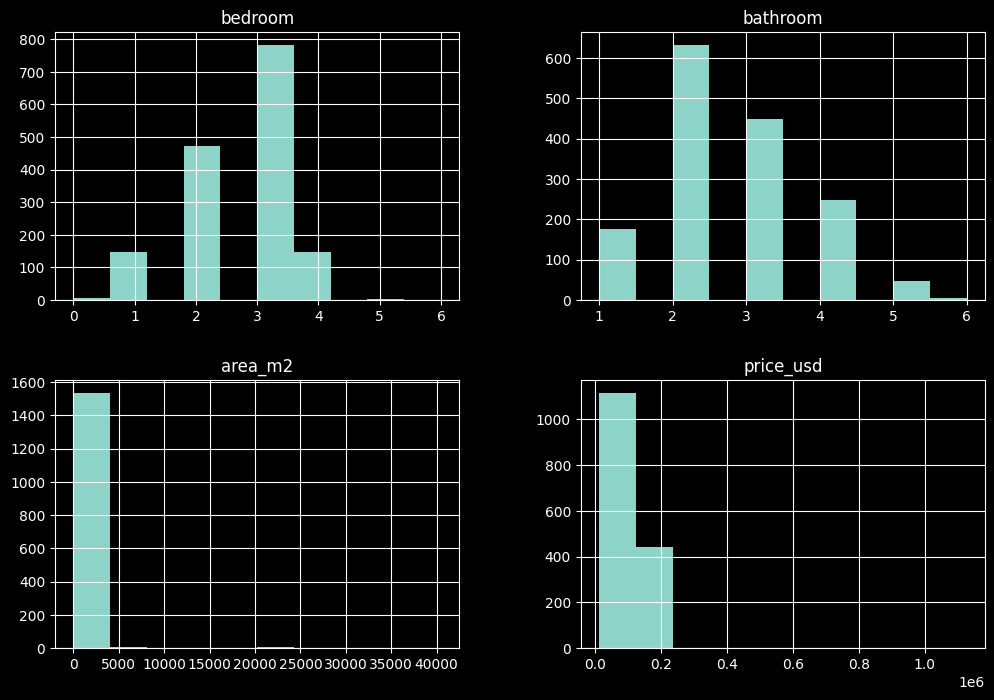

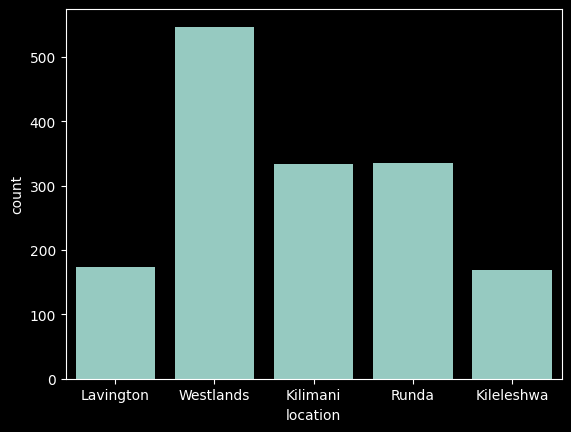

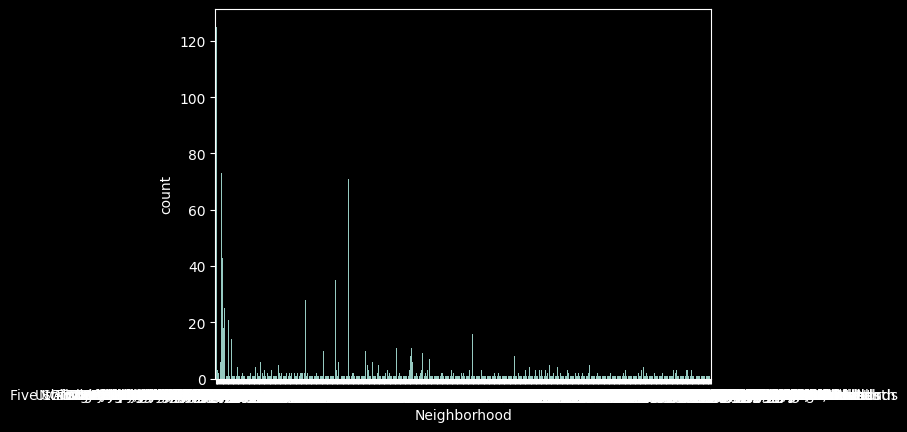

In [ ]:
# Histogram for numerical columns
df.hist(figsize=(12, 8))
plt.show()

# Count plots for categorical variables
for col in df.select_dtypes(include=['object', 'category']):
    sns.countplot(x=col, data=df)
    plt.show()

            bedroom  bathroom   area_m2  price_usd
bedroom    1.000000  0.732407 -0.013369   0.319953
bathroom   0.732407  1.000000  0.003651   0.389199
area_m2   -0.013369  0.003651  1.000000  -0.025848
price_usd  0.319953  0.389199 -0.025848   1.000000


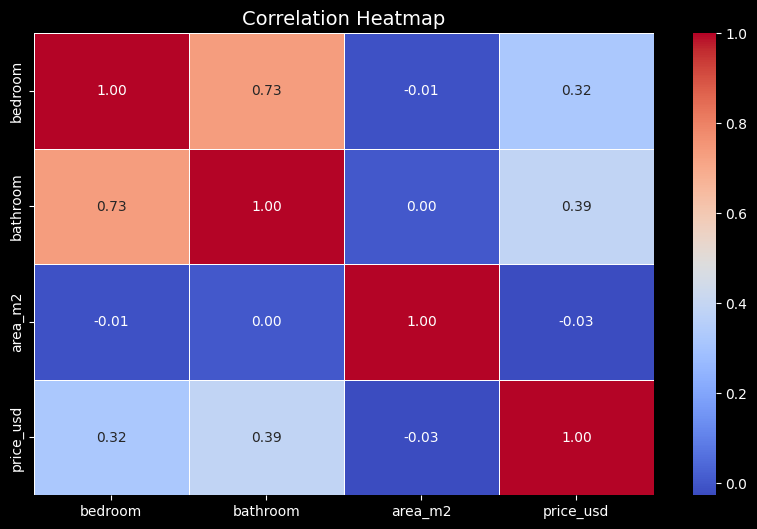

Strong correlations (>|0.7|):
            bedroom  bathroom
bedroom        NaN  0.732407
bathroom  0.732407       NaN


In [ ]:
# --- 1. Correlation matrix ---
corr_matrix = df.corr(numeric_only=True)  # only numeric cols
print(corr_matrix)

# --- 2. Heatmap visualization ---
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# --- 3. Strong correlations (threshold) ---
threshold = 0.7
strong_corrs = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)]
print("Strong correlations (>|0.7|):\n", strong_corrs.dropna(how="all").dropna(axis=1, how="all"))

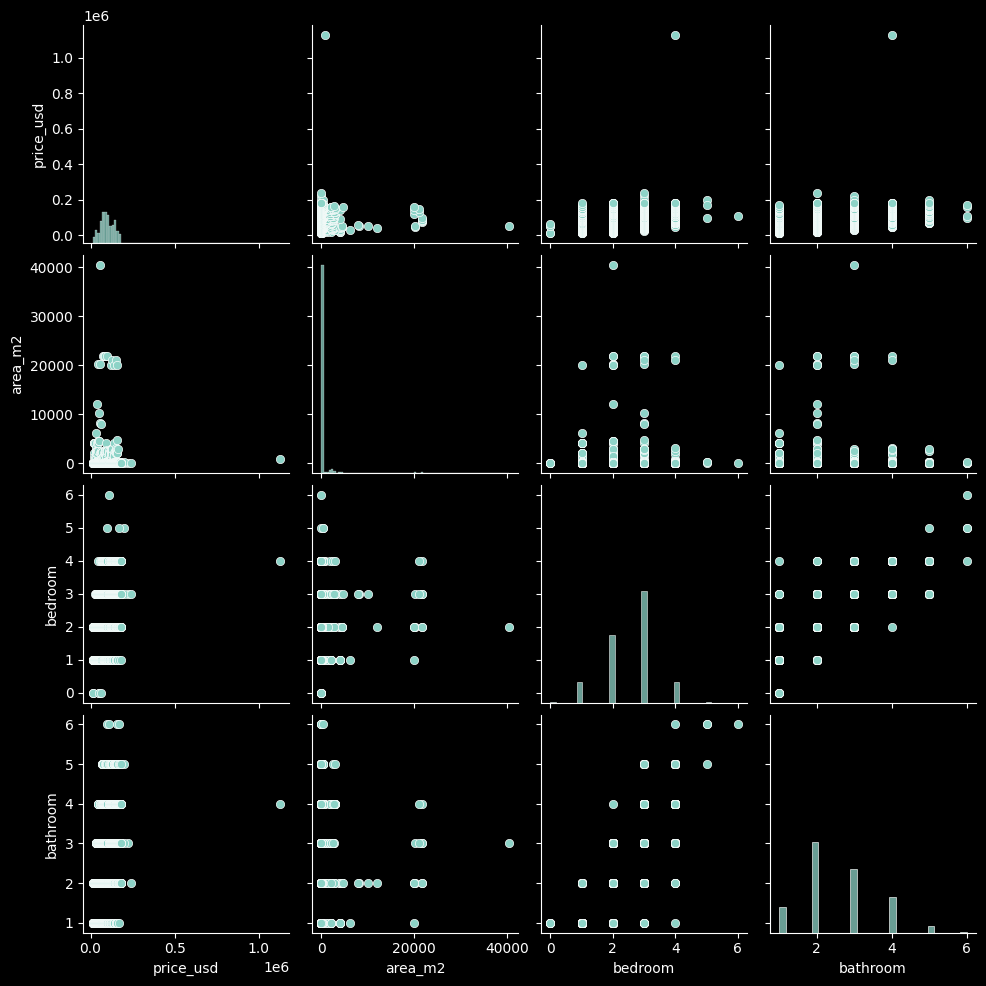

In [ ]:
sns.pairplot(df[["price_usd", "area_m2", "bedroom", "bathroom"]])
plt.show()


Just completed my first ever analysis project!!